In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df=df.drop(['Name','Ticket','Fare','PassengerId'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


0.38910778230082704

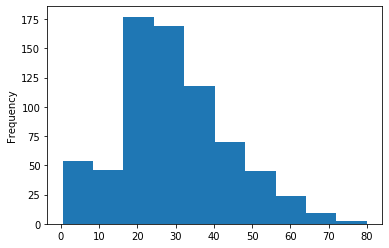

In [6]:
df['Age'].plot.hist()
df['Age'].skew()

In [7]:
df['Age'].isna().sum()

177

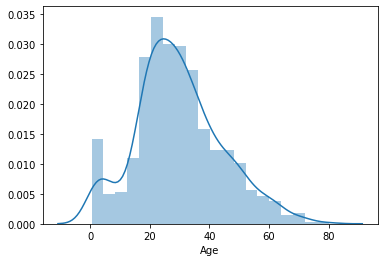

In [8]:
import seaborn as sns 
sns.distplot(df['Age'])

In [9]:
df['Age_random']=df['Age']
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=42)
random_sample.index=df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(),'Age_random']=random_sample

In [10]:
df['Age'].isnull().sum()

177

In [11]:
df['Age_random'].isnull().sum()

0

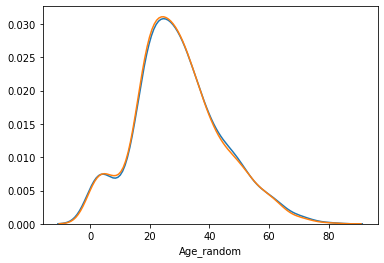

In [12]:
sns.distplot(df['Age'],hist=False)
sns.distplot(df['Age_random'],hist=False)

In [13]:
df['Age_random'].isnull().sum()

0

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Age_random
0,0,3,male,22.0,1,0,NaN,S,22.0
1,1,1,female,38.0,1,0,C85,C,38.0
2,1,3,female,26.0,0,0,NaN,S,26.0
3,1,1,female,35.0,1,0,C123,S,35.0
4,0,3,male,35.0,0,0,NaN,S,35.0


In [15]:
df=df.drop(['Age'],axis=1)

In [16]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_random
0,0,3,male,1,0,NaN,S,22.0
1,1,1,female,1,0,C85,C,38.0
2,1,3,female,0,0,NaN,S,26.0
3,1,1,female,1,0,C123,S,35.0
4,0,3,male,0,0,NaN,S,35.0


In [17]:
df['Cabin'].isnull().sum()

687

In [18]:
df['Cabin'].fillna("Missing",inplace=True)

In [19]:
df['Cabin'].isnull().sum()

0

In [20]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_random
0,0,3,male,1,0,Missing,S,22.0
1,1,1,female,1,0,C85,C,38.0
2,1,3,female,0,0,Missing,S,26.0
3,1,1,female,1,0,C123,S,35.0
4,0,3,male,0,0,Missing,S,35.0


In [21]:
df['Embarked'].mode()

0    S
dtype: object

In [22]:
df['Embarked'].fillna("S",inplace=True)

In [23]:
df['Embarked'].isnull().sum()

0

In [24]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_random
0,0,3,male,1,0,Missing,S,22.0
1,1,1,female,1,0,C85,C,38.0
2,1,3,female,0,0,Missing,S,26.0
3,1,1,female,1,0,C123,S,35.0
4,0,3,male,0,0,Missing,S,35.0


In [25]:
dummy=pd.get_dummies(df['Sex'],drop_first=True)
dummy.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
df=pd.concat([df,dummy],axis=1)

In [27]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_random,male
0,0,3,male,1,0,Missing,S,22.0,1
1,1,1,female,1,0,C85,C,38.0,0
2,1,3,female,0,0,Missing,S,26.0,0
3,1,1,female,1,0,C123,S,35.0,0
4,0,3,male,0,0,Missing,S,35.0,1


In [28]:
df['Embarked'].isnull().sum()

0

In [29]:
dummy1=pd.get_dummies(df['Embarked'],drop_first=True)
dummy1.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
df=pd.concat([df,dummy1],axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_random,male,Q,S
0,0,3,male,1,0,Missing,S,22.0,1,0,1
1,1,1,female,1,0,C85,C,38.0,0,0,0
2,1,3,female,0,0,Missing,S,26.0,0,0,1
3,1,1,female,1,0,C123,S,35.0,0,0,1
4,0,3,male,0,0,Missing,S,35.0,1,0,1


In [31]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [32]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_random,male,Q,S
0,0,3,male,1,0,M,S,22.0,1,0,1
1,1,1,female,1,0,C,C,38.0,0,0,0
2,1,3,female,0,0,M,S,26.0,0,0,1
3,1,1,female,1,0,C,S,35.0,0,0,1
4,0,3,male,0,0,M,S,35.0,1,0,1


In [33]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [34]:
dummy2=pd.get_dummies(df['Cabin'],drop_first=True)
dummy2.head()

,B,C,D,E,F,G,M,T
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0


In [35]:
df=pd.concat([df,dummy2],axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_random,male,Q,S,B,C,D,E,F,G,M,T
0,0,3,male,1,0,M,S,22.0,1,0,1,0,0,0,0,0,0,1,0
1,1,1,female,1,0,C,C,38.0,0,0,0,0,1,0,0,0,0,0,0
2,1,3,female,0,0,M,S,26.0,0,0,1,0,0,0,0,0,0,1,0
3,1,1,female,1,0,C,S,35.0,0,0,1,0,1,0,0,0,0,0,0
4,0,3,male,0,0,M,S,35.0,1,0,1,0,0,0,0,0,0,1,0


In [36]:
df=df.drop(['Sex','Cabin','Embarked'],axis=1)
df.head()

,Survived,Pclass,SibSp,Parch,Age_random,male,Q,S,B,C,D,E,F,G,M,T
0,0,3,1,0,22.0,1,0,1,0,0,0,0,0,0,1,0
1,1,1,1,0,38.0,0,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,26.0,0,0,1,0,0,0,0,0,0,1,0
3,1,1,1,0,35.0,0,0,1,0,1,0,0,0,0,0,0
4,0,3,0,0,35.0,1,0,1,0,0,0,0,0,0,1,0


In [37]:
X=df.drop(['Survived'],axis=1)
X.head()

,Pclass,SibSp,Parch,Age_random,male,Q,S,B,C,D,E,F,G,M,T
0,3,1,0,22.0,1,0,1,0,0,0,0,0,0,1,0
1,1,1,0,38.0,0,0,0,0,1,0,0,0,0,0,0
2,3,0,0,26.0,0,0,1,0,0,0,0,0,0,1,0
3,1,1,0,35.0,0,0,1,0,1,0,0,0,0,0,0
4,3,0,0,35.0,1,0,1,0,0,0,0,0,0,1,0


In [38]:
Y=df['Survived'].copy()
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [40]:
len(X_train)

623

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\mayur\Anaconda3\anacondaproject\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
Y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
score=confusion_matrix(Y_test,Y_pred)

In [43]:
score

array([[135,  22],
       [ 30,  81]], dtype=int64)

In [44]:
tp=score[0,0]
tp

135

In [45]:
fp=score[0,1]
fp

22

In [46]:
fn=score[1,0]
fn

30

In [47]:
tn=score[1,1]
tn

81

In [48]:
accuracy=(tp+tn)/(tp+tn+fn+fp)
accuracy

0.8059701492537313

In [49]:
from sklearn.metrics import fbeta_score,f1_score,precision_score,recall_score
fscore=fbeta_score(Y_test, Y_pred, beta=0.5)
pscore=precision_score(Y_test, Y_pred)
rscore=recall_score(Y_test, Y_pred)
print(fscore,rscore,pscore)

0.774378585086042 0.7297297297297297 0.7864077669902912
